In [45]:
import numpy as np
import pandas as pd 
import random as rd
import matplotlib.pyplot as plt
from math import sqrt

In [46]:
Dic={
"Name":['Aliyan','Ali','Mehak','Rafia','Iftikhar','Umair','Sana','Waqas','Sonia','Ahemd'],
"Age":[32,40,16,34,55,40,20,15,55,16],
"Gender":['M','M','F','F','M','M','F','M','F','M'],
"Class_of_sport":['Football','Neither','Cricket','Cricket','Neither','Cricket','Neither','Cricket','Football','Football',]
}
df = pd.DataFrame(Dic)

df['Gender']=df['Gender'].apply(lambda x: 0 if x=='M'else 1)
display(df)

,Name,Age,Gender,Class_of_sport
0,Aliyan,32,0,Football
1,Ali,40,0,Neither
2,Mehak,16,1,Cricket
3,Rafia,34,1,Cricket
4,Iftikhar,55,0,Neither
5,Umair,40,0,Cricket
6,Sana,20,1,Neither
7,Waqas,15,0,Cricket
8,Sonia,55,1,Football
9,Ahemd,16,0,Football


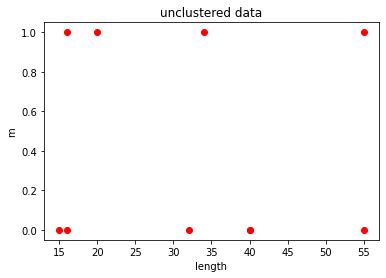

In [47]:
df=df[["Age","Gender"]]
plt.scatter(df["Age"],df["Gender"],color='r')
plt.title("unclustered data")
plt.xlabel("length")
plt.ylabel("m")
plt.show()

In [48]:
K=2
Centroids=(df.sample(n=K))
Centroids

,Age,Gender
4,55,0
5,40,0


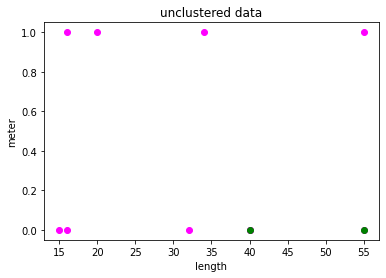

In [49]:
plt.scatter(df["Age"],df["Gender"],c="magenta")
plt.scatter(Centroids["Age"],Centroids["Gender"],c="green")
plt.title("unclustered data")
plt.xlabel("length")
plt.ylabel("meter")
plt.show()

In [57]:
difference=1
count=0
while(difference!=0):
    x=df
    i=1
    for index1,row_c in Centroids.iterrows():
        E=[]
        for index2,row_d in x.iterrows():
            d=sqrt((row_c["Age"]-row_d["Gender"])**2+(row_c["Age"]-row_d["Gender"])**2)           
            E.append(d)
        df[i]=E
        i=i+1
    C=[]
    for index,row in df.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1]<min_dist:
                min_dist=row[i+1]
                pos=i+1
        C.append(pos)
    df["Cluster"]=C
    Centroids_new=df.groupby(["Cluster"]).mean()[["Gender","Age"]]
    if count== 0:
        difference= 1
        count=count+1
    else:
        difference=(Centroids_new['Gender']-Centroids['Gender']).sum()+(Centroids_new['Age']-Centroids['Age']).sum()
        print(difference.sum())
    Centroids=df.groupby(["Cluster"]).mean()[["Gender","Age"]]

0.0


In [51]:
Centroids

,Gender,Age
Cluster,,
1,0.4,32.3


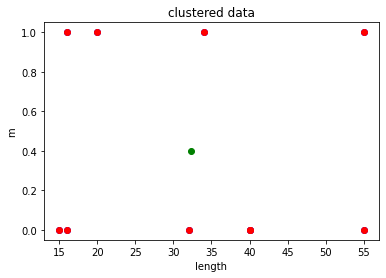

In [54]:
color=['b','r']
for k in range(K):
    data=df[df["Cluster"]==k+1]
    plt.scatter(df["Age"],df["Gender"],c=color[k])
plt.scatter(Centroids["Age"],Centroids["Gender"],c='green')
plt.title("clustered data")
plt.xlabel("length")
plt.ylabel("m")
plt.show()
    